In [179]:
import pandas as pd
import numpy as np
import math
import statistics
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from scipy import stats
import mord

dataFrame = pd.read_csv("NFLDraftDataCleaned.csv")

In [180]:
#Might want to do some preprocessing of data i.e. normalization
#Data should be normalized across these columns: 
#['rushingAttempts', 'rushingYards', 'avgYardsPerRush', 'rushingTouchdowns', 'receptions', 'receivingYards',
# 'avgYardsPerReception', 'receivingTouchdowns', 'fortyYardDash', 'verticalJump', 'benchPress', 'broadJump',
# 'threeCone', 'shuttle']

def normalizeColumn(columnName):
    #Retrieve the unscaled data from the relevant column
    unscaledValues = dataFrame[[columnName]].values
    
    #Scale them to within some distance of the mean
    minMaxScaler = preprocessing.MinMaxScaler()
    scaledValues = minMaxScaler.fit_transform(unscaledValues)
    
    #Drop the column containing the original values
    dataFrame.drop(columns = [columnName])
    
    #Add the scaled values back to the dataFrame under the same name
    dataFrame[columnName] = scaledValues
    
#Data should be standardized across the same columns
def standardizeColumn(columnName):
    #Retrieve the unscaled data from the relevant column
    unscaledValues = dataFrame[[columnName]].values
    
    #Use the standard scaler to standardize the data
    standardScaler = preprocessing.StandardScaler()
    scaledValues = standardScaler.fit_transform(unscaledValues)
    
    #Drop the column containing original values
    dataFrame.drop(columns = [columnName])
    
    #Add the standardized values back to the dataFrame under the same name
    dataFrame[columnName] = scaledValues

for columnName in ['rushingAttempts', 'rushingYards', 'avgYardsPerRush', 'rushingTouchdowns', 'receptions', 
                   'receivingYards', 'avgYardsPerReception', 'receivingTouchdowns', 'fortyYardDash', 
                   'verticalJump', 'benchPress', 'broadJump', 'threeCone', 'shuttle']:
    #First we should standardize the data
    standardizeColumn(columnName)
    
#     #Normalize the data within the columns
#     normalizeColumn(columnName)   

In [181]:
dataFrame.corr()

,draftRound,draftPick,age,height,weight,rushingAttempts,rushingYards,avgYardsPerRush,rushingTouchdowns,receptions,receivingYards,avgYardsPerReception,receivingTouchdowns,fortyYardDash,verticalJump,benchPress,broadJump,threeCone,shuttle
draftRound,1.000000,0.986655,0.259803,-0.051640,-0.010392,-0.067727,-0.090507,-0.095262,-0.097244,-0.148625,-0.175847,-0.132149,-0.206894,0.239576,-0.178377,-0.058141,-0.222274,0.113961,0.080370
draftPick,0.986655,1.000000,0.253790,-0.045444,-0.005063,-0.060936,-0.082493,-0.090762,-0.089813,-0.155477,-0.182051,-0.133985,-0.209697,0.241246,-0.185158,-0.057484,-0.222205,0.109459,0.080202
age,0.259803,0.253790,1.000000,0.044406,0.062752,-0.096648,-0.111835,-0.082481,-0.119385,-0.049819,-0.054767,-0.061205,-0.076069,0.145758,-0.027503,0.038185,-0.106888,0.000809,-0.037830
height,-0.051640,-0.045444,0.044406,1.000000,0.675741,-0.490384,-0.499382,-0.339394,-0.458755,-0.003347,0.049487,0.268642,0.118111,0.467537,-0.120214,0.138552,-0.082528,0.251488,0.276978
weight,-0.010392,-0.005063,0.062752,0.675741,1.000000,-0.083451,-0.098211,-0.368158,-0.064880,-0.397180,-0.409371,-0.149802,-0.310967,0.688401,-0.259257,0.529223,-0.304977,0.482477,0.401685
rushingAttempts,-0.067727,-0.060936,-0.096648,-0.490384,-0.083451,1.000000,0.990016,0.169967,0.955328,-0.407147,-0.513026,-0.575258,-0.516137,-0.137201,-0.045956,0.272737,-0.026233,0.046832,0.012340
rushingYards,-0.090507,-0.082493,-0.111835,-0.499382,-0.098211,0.990016,1.000000,0.195522,0.962649,-0.406883,-0.508235,-0.559787,-0.509087,-0.156620,-0.044270,0.260921,-0.014434,0.040219,0.006468
avgYardsPerRush,-0.095262,-0.090762,-0.082481,-0.339394,-0.368158,0.169967,0.195522,1.000000,0.178733,0.086576,0.092439,0.051350,0.043300,-0.364209,0.121890,-0.158122,0.173305,-0.167431,-0.119714
rushingTouchdowns,-0.097244,-0.089813,-0.119385,-0.458755,-0.064880,0.955328,0.962649,0.178733,1.000000,-0.397598,-0.493083,-0.528006,-0.485925,-0.139501,-0.043871,0.260894,-0.017552,0.047981,0.022035
receptions,-0.148625,-0.155477,-0.049819,-0.003347,-0.397180,-0.407147,-0.406883,0.086576,-0.397598,1.000000,0.958798,0.413935,0.851730,-0.214999,0.126331,-0.385111,0.147006,-0.326920,-0.207308


In [182]:
#Create new dataframes to hold independent and dependent variables
# X = dataFrame[['position', 'age', 'height', 'weight', 'collegeAttended', 'rushingAttempts', 'rushingYards',
#                            'avgYardsPerRush', 'rushingTouchdowns', 'receptions', 'receivingYards', 'avgYardsPerReception',
#                            'receivingTouchdowns', 'fortyYardDash', 'verticalJump', 'benchPress', 'broadJump', 'threeCone',
#                            'shuttle']]

#CURRENTLY EXCLUDING WEIGHT, HEIGHT, AGE and COLLEGE ATTNENDED
X = dataFrame[['position', 'age', 'weight', 'height', 'rushingAttempts', 'rushingYards',
                           'avgYardsPerRush', 'rushingTouchdowns', 'receptions', 'receivingYards', 'avgYardsPerReception',
                           'receivingTouchdowns', 'fortyYardDash', 'verticalJump', 'benchPress', 'broadJump', 'threeCone',
                           'shuttle']]
y = dataFrame[['draftRound']]

In [183]:
#Some of the dependent variables (position and collegeAttended) are stored as categorical data
#This needs to be converted to numerical data using OneHotEncoder
onehot = pd.get_dummies(X['position'])
X = X.drop('position', axis = 1)
X = X.join(onehot)

# onehot = pd.get_dummies(X['collegeAttended'])
# X = X.drop('collegeAttended', axis = 1)
# X = X.join(onehot)

In [184]:
#Split the dataset into some training data and testing data
#Test data starts at row 795 out of 936
X_Train, X_Test, y_Train, y_Test = train_test_split(X, y, test_size = 0.15, shuffle = False)

In [185]:
#Create a linear regression model and fit it to the train data
linearRegressionModel = LinearRegression(normalize = True).fit(X_Train, y_Train)

#Predict the draft round for the test set
unformattedPredictions = linearRegressionModel.predict(X_Test)

linearRegressionPredictions = []

#There are some errors with our predictions, they are giving wildly higher scores
for prediction in unformattedPredictions:
    if(prediction < 1.5):
        linearRegressionPredictions.append(1)
    if(prediction >= 1.5 and prediction < 2.5):
        linearRegressionPredictions.append(2)
    if(prediction >= 2.5 and prediction < 3.5):
        linearRegressionPredictions.append(3)
    if(prediction >= 3.5 and prediction < 4.5):
        linearRegressionPredictions.append(4)
    if(prediction >= 4.5 and prediction < 5.5):
        linearRegressionPredictions.append(5)
    if(prediction >= 5.5 and prediction < 6.5):
        linearRegressionPredictions.append(6)
    if(prediction >= 6.5):
        linearRegressionPredictions.append(7)   
        
print("LINEAR REGRESSION SCORES:")
explainedVarianceScore = metrics.explained_variance_score(y_Test, linearRegressionPredictions)
print("Explained variance score = ", explainedVarianceScore)

meanAbsoluteError = metrics.mean_absolute_error(y_Test, linearRegressionPredictions)
print("Mean absolute error = ", meanAbsoluteError)

rSquared = metrics.r2_score(y_Test, linearRegressionPredictions)
print("R Squared = ", rSquared)

f1Score = metrics.f1_score(y_Test, linearRegressionPredictions, average="micro")
print("F1 score = ", f1Score)

correlationScore = stats.spearmanr(y_Test, linearRegressionPredictions)
print("Correlation score = ", correlationScore)

print()
print('Confusion Matrix:')
print(metrics.confusion_matrix(y_Test, linearRegressionPredictions))

LINEAR REGRESSION SCORES:
Explained variance score =  0.19472033455305793
Mean absolute error =  1.3687943262411348
R Squared =  0.08481442760062718
F1 score =  0.23404255319148937
Correlation score =  SpearmanrResult(correlation=0.45158144810273726, pvalue=1.9049764466630437e-08)

Confusion Matrix:
[[ 1  9  3  1  2  0  0]
 [ 2  6  6  3  0  0  0]
 [ 2  5  5  6  2  0  0]
 [ 0  2  8 15  5  0  0]
 [ 0  3  6 11  5  0  0]
 [ 0  2  1  7  2  1  0]
 [ 0  0  6  7  6  1  0]]


In [186]:
#Create an ordinal logistic regression model and fit it to the training data
ordinalLogisticModel = mord.OrdinalRidge()
ordinalLogisticModel.fit(X_Train, y_Train)

#Create some predictions based on the ordinal logistic regression model
ordinalLogisticPredictions = ordinalLogisticModel.predict(X_Test)

print("ORDINAL LOGISTIC REGRESSION SCORES:")
explainedVarianceScore = metrics.explained_variance_score(y_Test, ordinalLogisticPredictions)
print("Explained variance score = ", explainedVarianceScore)

meanAbsoluteError = metrics.mean_absolute_error(y_Test, ordinalLogisticPredictions)
print("Mean absolute error = ", meanAbsoluteError)

rSquared = metrics.r2_score(y_Test, ordinalLogisticPredictions)
print("RSquared = ", rSquared)

f1Score = metrics.f1_score(y_Test, ordinalLogisticPredictions, average="micro")
print("F1 score = ", f1Score)

correlationScore = stats.spearmanr(y_Test, ordinalLogisticPredictions)
print("Correlation score = ", correlationScore)

print()
print('Confusion Matrix:')
print(metrics.confusion_matrix(y_Test, ordinalLogisticPredictions))

ORDINAL LOGISTIC REGRESSION SCORES:
Explained variance score =  0.206540047627345
Mean absolute error =  1.375886524822695
RSquared =  0.09914619271650105
F1 score =  0.21276595744680848
Correlation score =  SpearmanrResult(correlation=0.4581803268992609, pvalue=1.1104228079543716e-08)

Confusion Matrix:
[[ 1  9  4  0  2  0  0]
 [ 2  4  8  3  0  0  0]
 [ 2  4  6  6  2  0  0]
 [ 0  2  8 15  5  0  0]
 [ 0  2  7 12  4  0  0]
 [ 0  2  1  7  3  0  0]
 [ 0  0  6  7  6  1  0]]


In [187]:
#Create an multinominal logistic regression model and fit it to the training data
multinomialLogisticModel = LogisticRegression(solver = "newton-cg", multi_class = "multinomial", max_iter = 100)
multinomialLogisticModel.fit(X_Train, y_Train)

#Create some predictions based on the ordinal logistic regression model
unshapedMultinomialLogisticPredictions = multinomialLogisticModel.predict(X_Test)
multinomialLogisticPredictions = np.reshape(unshapedMultinomialLogisticPredictions, (141, 1))

print("MULTINOMIAL LOGISTIC REGRESSION SCORES:")
explainedVarianceScore = metrics.explained_variance_score(y_Test, multinomialLogisticPredictions)
print("Explained variance score = ", explainedVarianceScore)

meanAbsoluteError = metrics.mean_absolute_error(y_Test, multinomialLogisticPredictions)
print("Mean absolute error = ", meanAbsoluteError)

rSquared = metrics.r2_score(y_Test, multinomialLogisticPredictions)
print("RSquared = ", rSquared)

f1Score = metrics.f1_score(y_Test, multinomialLogisticPredictions, average="micro")
print("F1 score = ", f1Score)

correlationScore = stats.spearmanr(y_Test, multinomialLogisticPredictions)
print("Correlation score = ", correlationScore)

print()
print('Confusion Matrix:')
print(metrics.confusion_matrix(y_Test, multinomialLogisticPredictions))

/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MULTINOMIAL LOGISTIC REGRESSION SCORES:
Explained variance score =  -0.09420921182552133
Mean absolute error =  1.7304964539007093
RSquared =  -0.46593483185223916
F1 score =  0.2056737588652482
Correlation score =  SpearmanrResult(correlation=0.4254613469582429, pvalue=1.4467954975130893e-07)

Confusion Matrix:
[[11  2  2  0  0  0  1]
 [ 7  5  3  2  0  0  0]
 [ 7  3  6  1  2  1  0]
 [ 3  8 10  4  3  1  1]
 [ 5  2  7  7  0  1  3]
 [ 2  1  4  3  1  2  0]
 [ 2  3  4  3  4  3  1]]


In [188]:
#Create a lasso regression model and fit it to the training data
lassoRegressionModel = Lasso()
lassoRegressionModel.fit(X_Train, y_Train)

#Make some predictions based on the test data from this model
unshapedLassoPredictions = lassoRegressionModel.predict(X_Test)

unformattedLassoPredictions = np.reshape(unshapedLassoPredictions, (141, 1))

lassoRegressionPredictions = []

#The Lasso Regression Model returns continuous data, therefore need to round each number
for prediction in unformattedLassoPredictions:
    roundedPrediction = prediction[0].round()
    lassoRegressionPredictions.append(roundedPrediction)

print("LASSO REGRESSION SCORES:")
explainedVarianceScore = metrics.explained_variance_score(y_Test, lassoRegressionPredictions)
print("Explained variance score = ", explainedVarianceScore)

meanAbsoluteError = metrics.mean_absolute_error(y_Test, lassoRegressionPredictions)
print("Mean absolute error = ", meanAbsoluteError)

rSquared = metrics.r2_score(y_Test, lassoRegressionPredictions)
print("RSquared = ", rSquared)

f1Score = metrics.f1_score(y_Test, lassoRegressionPredictions, average="micro")
print("F1 score = ", f1Score)

correlationScore = stats.spearmanr(y_Test, lassoRegressionPredictions)
print("Correlation score = ", correlationScore)

print()
print('Confusion Matrix:')
print(metrics.confusion_matrix(y_Test, lassoRegressionPredictions))

LASSO REGRESSION SCORES:
Explained variance score =  0.0
Mean absolute error =  1.5106382978723405
RSquared =  -0.0011761630946158785
F1 score =  0.21276595744680848
Correlation score =  SpearmanrResult(correlation=nan, pvalue=nan)

Confusion Matrix:
[[ 0  0  0 16  0  0  0]
 [ 0  0  0 17  0  0  0]
 [ 0  0  0 20  0  0  0]
 [ 0  0  0 30  0  0  0]
 [ 0  0  0 25  0  0  0]
 [ 0  0  0 13  0  0  0]
 [ 0  0  0 20  0  0  0]]


/anaconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:2400: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/anaconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:2401: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


In [189]:
##### Create a lasso regression model and fit it to the training data
randomForestModel = RandomForestRegressor()
randomForestModel.fit(X_Train, y_Train.values.ravel())

#Make some predictions based on the test data from this model
unshapedRandomForestPredictions = randomForestModel.predict(X_Test)

unformattedRandomForestPredictions = np.reshape(unshapedRandomForestPredictions, (141, 1))

randomForestRegressionPredictions = []

#The Random Forest returns floats, need to round each number to closest round
for prediction in unformattedRandomForestPredictions:
    roundedPrediction = prediction[0].round()
    randomForestRegressionPredictions.append(roundedPrediction)

print("RANDOM FOREST REGRESSOR SCORES:")
explainedVarianceScore = metrics.explained_variance_score(y_Test, randomForestRegressionPredictions)
print("Explained variance score = ", explainedVarianceScore)

meanAbsoluteError = metrics.mean_absolute_error(y_Test, randomForestRegressionPredictions)
print("Mean absolute error = ", meanAbsoluteError)

rSquared = metrics.r2_score(y_Test, randomForestRegressionPredictions)
print("RSquared = ", rSquared)

f1Score = metrics.f1_score(y_Test, randomForestRegressionPredictions, average="micro")
print("F1 score = ", f1Score)

correlationScore = stats.spearmanr(y_Test, randomForestRegressionPredictions)
print("Correlation score = ", correlationScore)

print()
print('Confusion Matrix:')
print(metrics.confusion_matrix(y_Test, randomForestRegressionPredictions))

RANDOM FOREST REGRESSOR SCORES:
Explained variance score =  0.12133356566184583
Mean absolute error =  1.425531914893617
RSquared =  0.05615089736887946
F1 score =  0.21276595744680848
Correlation score =  SpearmanrResult(correlation=0.3887533856231734, pvalue=1.8993513310200888e-06)

Confusion Matrix:
[[ 0  6  7  2  1  0  0]
 [ 0  6  6  4  1  0  0]
 [ 0  5  4  9  2  0  0]
 [ 0  4  6 15  4  1  0]
 [ 0  4  4 13  3  1  0]
 [ 0  1  3  5  2  2  0]
 [ 0  1  3  9  6  1  0]]


/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


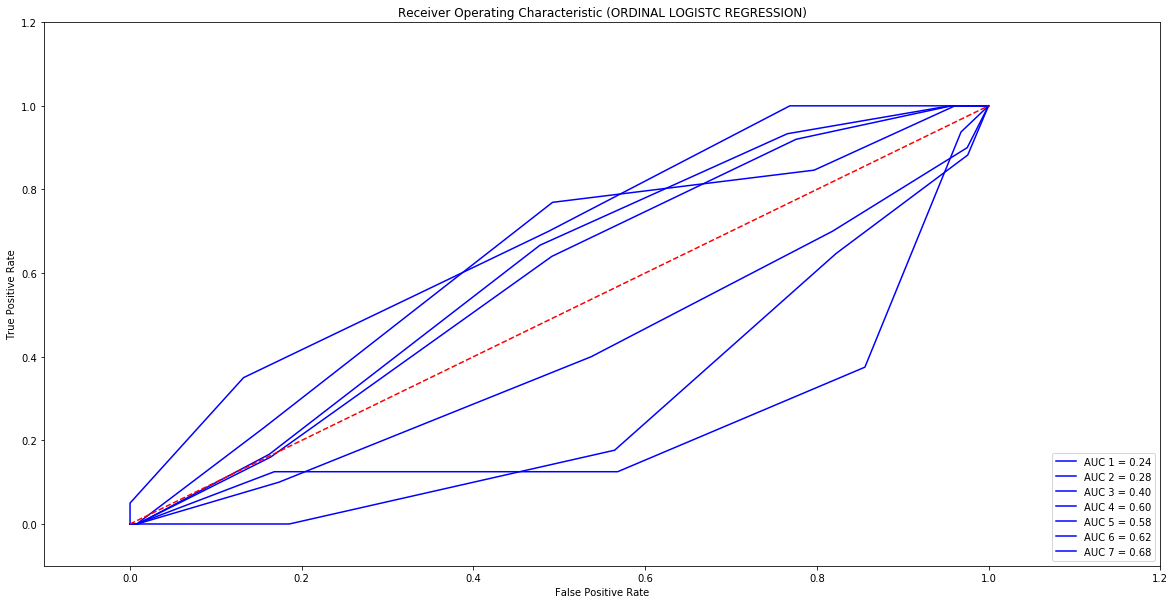

In [190]:
#Create a ROC curve for the ordinal logistic regression model
plt.figure(figsize=(20, 10))

for round in range(1, 8):
    false_positive_rate, true_positive_rate, thresholds = metrics.roc_curve(y_Test, ordinalLogisticPredictions, pos_label = round)
    roc_auc = metrics.auc(false_positive_rate, true_positive_rate)
    plt.plot(false_positive_rate, true_positive_rate, 'b', label = 'AUC %d = %0.2f' % (round, roc_auc))
     
##Plot the FPR vs. TPR
plt.title('Receiver Operating Characteristic (ORDINAL LOGISTC REGRESSION)')
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.savefig("ROC Curve(Ordinal Logistic Regression)")
plt.show()


In [191]:
#Need to add columns to the dataFrame which contains the predictions for a particular model
#We know we split at a certain row within the dataFrame
splitRow = 795

#Create column to store Multinomial Logistic Regression Predictions
indexInPredictions = 0
dataFrame['multinomialLogisticPrediction'] = 0

unshapedTrainingDataMultinomialPredictions = multinomialLogisticModel.predict(X_Train)
trainingDataMultinomialPredictions = np.reshape(unshapedTrainingDataMultinomialPredictions, (795, 1))
testDataMultinomialPredictions = multinomialLogisticPredictions
allMultinomialLogisticPredictions = []

#Merge the two datasets
for prediction in trainingDataMultinomialPredictions:
    allMultinomialLogisticPredictions.append(prediction[0])
    
for prediction in testDataMultinomialPredictions:
    allMultinomialLogisticPredictions.append(prediction[0])

for index, row in dataFrame.iterrows():
    playerName = row['playerName']

    prediction = allMultinomialLogisticPredictions[indexInPredictions]
    dataFrame.loc[dataFrame['playerName'] == playerName, 'multinomialLogisticPrediction'] = prediction
    indexInPredictions += 1

#Create column to store Lasso Regressions Predictions
indexInPredictions = 0
dataFrame['lassoRegressionPrediction'] = 0

unshapedTrainingDataLassoRegressionPredictions = lassoRegressionModel.predict(X_Train)
unformattedTrainingDataLassoRegressionPredictions = np.reshape(unshapedTrainingDataLassoRegressionPredictions, (795, 1))
trainingDataLassoRegressionPredictions = []

#Round values in new predictions
for prediction in unformattedTrainingDataLassoRegressionPredictions:
    roundedPrediction = prediction[0].round()
    trainingDataLassoRegressionPredictions.append(roundedPrediction)

testDataLassoRegressionPredictions = lassoRegressionPredictions
allLassoRegressionPredictions = []

for prediction in trainingDataLassoRegressionPredictions:
    if prediction < 1:
        prediction = 1
    if prediction > 7:
        prediction = 7
    allLassoRegressionPredictions.append(prediction)
    
for prediction in testDataLassoRegressionPredictions:
    allLassoRegressionPredictions.append(prediction)

for index, row in dataFrame.iterrows():
    playerName = row['playerName']
    
    prediction = allLassoRegressionPredictions[indexInPredictions]
    dataFrame.loc[dataFrame['playerName'] == playerName, 'lassoRegressionPrediction'] = prediction
    indexInPredictions += 1

#Create column to store Random Forest Regressor Predictions
indexInPredictions = 0
dataFrame['randomForestPrediction'] = 0

unshapedTrainingDataRandomForestPredictions = randomForestModel.predict(X_Train)
unformattedTrainingDataRandomForestPredictions = np.reshape(unshapedTrainingDataRandomForestPredictions, (795, 1))
trainingDataRandomForestPredictions = []

for prediction in unformattedTrainingDataRandomForestPredictions:
    roundedPrediction = prediction[0].round()
    trainingDataRandomForestPredictions.append(roundedPrediction)
    
testDataRandomForestPredictions = randomForestRegressionPredictions
allRandomForestRegressionPredictions = []


for prediction in trainingDataRandomForestPredictions:
    allRandomForestRegressionPredictions.append(prediction)
    
for prediction in testDataRandomForestPredictions:
    allRandomForestRegressionPredictions.append(prediction)

for index, row in dataFrame.iterrows():
    playerName = row['playerName']

    prediction = allRandomForestRegressionPredictions[indexInPredictions]
    dataFrame.loc[dataFrame['playerName'] == playerName, 'randomForestPrediction'] = prediction
    indexInPredictions += 1

In [192]:
##ADVERSE IMPACT ANALYSIS##
#We have a number of different models that can be used
#Select the best three and carry out an adverse impacts analysis on age, weight and height
#To analyse adverse impact on different models, change this section

#Calculate the mean draft round of players within the dataset
meanDraftRound = 3.5

#Create an additional column in the dataFrame which states whether they:
#'Pass' = are picked before the average draft round (1)
#'Fail' = are picked after the average draft round (0)
dataFrame['adverseImpactCheck'] = 2

#Go through all players in the dataFrame and assign if they 'Pass' or 'Fail'
for index, row in dataFrame.iterrows():
    playerName = row['playerName']
    
    if row['randomForestPrediction'] < meanDraftRound:
        adverseImpactCheck = 1
    elif row['randomForestPrediction'] > meanDraftRound:
        adverseImpactCheck = 0
        
    #Assign 'adverseImpactCheck' column to correct value
    dataFrame.loc[dataFrame['playerName'] == playerName, 'adverseImpactCheck'] = adverseImpactCheck
    

In [193]:
#Check whether players over the mean age are adversely impacted
checkAge = dataFrame['age'].mean()

totalNumPlayers = 0
numPlayersPassed = 0
totalNumPlayersOver = 0
numPlayersOverPassed = 0
totalNumPlayersUnder = 0
numPlayersUnderPassed = 0

for index, row in dataFrame.iterrows():  
    #For calculation of 2SD, keep track of total population pass and fail rate
    totalNumPlayers += 1
    numPlayersPassed += row['adverseImpactCheck']
    
    #If the player is over, add a number to the total
    if row['age'] > checkAge:
        totalNumPlayersOver += 1
        
        #Add the 'adverseImpactCheck' value to calculate the average
        numPlayersOverPassed += row['adverseImpactCheck']
        
    #Else if the player is under, add to the correct total
    if row['age'] < checkAge:
        totalNumPlayersUnder += 1
        
        #Add the 'adverseImpactCheck' value calculate the average
        numPlayersUnderPassed += row['adverseImpactCheck']
    
playersOverPassRate = numPlayersOverPassed / totalNumPlayersOver
playersUnderPassRate = numPlayersUnderPassed / totalNumPlayersUnder

print("ADVERSE IMPACT CHECK - AGE:")
print("Mean age = ", checkAge)
print("-----------")
print("Over Statistic: ", "Total = ", totalNumPlayersOver, " Players Passed = ", numPlayersOverPassed, 
      " Pass Rate = ", playersOverPassRate)
print("Under Statistic: ", "Total = ", totalNumPlayersUnder, " Players Passed = ", numPlayersUnderPassed, 
      " Pass Rate = ", playersUnderPassRate)
print("-----------")

#Using the 4/5ths rule check if older players are impacted
adverseImpactValue = playersOverPassRate/playersUnderPassRate
print("4/5ths Adverse Impact Value: ", adverseImpactValue)

#Using the 2 SD rule check if older players are impacted
# r = number of people who pass from specific group
# n = number of people who passed in total
# p = proportion of total players that could be impacted
# q = proportion of players passed from specific group

r = numPlayersOverPassed
n = numPlayersPassed
p = totalNumPlayersOver / totalNumPlayers
q = n / totalNumPlayers

adverseImpactValue = ((r/n)-p) / (math.sqrt(p*(1-p)/n) * math.sqrt(1-q))
print("2 SD Adverse Impact Value: ", adverseImpactValue)

#Using the Cohen's D rule check if older players are impacted
# M1= Mean Pass for impacted players
# M2 = Mean Pass for unimpacted players
# S1 = Standard Dev. for impacted players
# S2 = Standard Dev. for unimpacted players

#Create arrays to store the pass info for impacted players and unimpacted players
overPlayerPassData = [None] * totalNumPlayersOver
underPlayerPassData = [None] * totalNumPlayersUnder

for index in range(0, len(overPlayerPassData)):
    if(index < numPlayersOverPassed):
        overPlayerPassData[index] = 1
    else:
        overPlayerPassData[index] = 0
        
for index in range(0, len(underPlayerPassData)):
    if(index < numPlayersUnderPassed):
        underPlayerPassData[index] = 1
    else:
        underPlayerPassData[index] = 0
        
M1 = sum(overPlayerPassData) / len(overPlayerPassData)
M2 = sum(underPlayerPassData) / len(underPlayerPassData)
SD1 = statistics.stdev(overPlayerPassData)
SD2 = statistics.stdev(underPlayerPassData)

adverseImpactValue = (M1 - M2) / (math.sqrt((SD1 ** 2 + SD2 ** 2) / 2))
print("Cohen's D Adverse Impact Value = ", adverseImpactValue)

ADVERSE IMPACT CHECK - AGE:
Mean age =  22.306623931623932
-----------
Over Statistic:  Total =  383  Players Passed =  107  Pass Rate =  0.2793733681462141
Under Statistic:  Total =  553  Players Passed =  314  Pass Rate =  0.5678119349005425
-----------
4/5ths Adverse Impact Value:  0.49201742861419234
2 SD Adverse Impact Value:  -8.721848596942237
Cohen's D Adverse Impact Value =  -0.6096438859147614


In [194]:
#Check whether players under the mean weight are adversely impacted
checkWeight = dataFrame['weight'].mean()

totalNumPlayers = 0
numPlayersPassed = 0
totalNumPlayersOver = 0
numPlayersOverPassed = 0
totalNumPlayersUnder = 0
numPlayersUnderPassed = 0

for index, row in dataFrame.iterrows():
    #For calculation of 2SD, keep track of total population pass and fail rate
    totalNumPlayers += 1
    numPlayersPassed += row['adverseImpactCheck']
    
    #If the player is over, add a number to the total
    if row['weight'] > checkWeight:
        totalNumPlayersOver += 1
        
        #Add the 'adverseImpactCheck' value to calculate the average
        numPlayersOverPassed += row['adverseImpactCheck']
        
    #Else if the player is under, add to the correct total
    if row['weight'] < checkWeight:
        totalNumPlayersUnder += 1
        
        #Add the 'adverseImpactCheck' value calculate the average
        numPlayersUnderPassed += row['adverseImpactCheck']
    
playersOverPassRate = numPlayersOverPassed / totalNumPlayersOver
playersUnderPassRate = numPlayersUnderPassed / totalNumPlayersUnder

print("ADVERSE IMPACT CHECK - WEIGHT:")
print("Mean weight = ", checkWeight)
print("-----------")
print("Over Statistic: ", "Total = ", totalNumPlayersOver, " Players Passed = ", numPlayersOverPassed, 
      " Pass Rate = ", playersOverPassRate)
print("Under Statistic: ", "Total = ", totalNumPlayersUnder, " Players Passed = ", numPlayersUnderPassed, 
      " Pass Rate = ", playersUnderPassRate)
print("-----------")

#Using the 4/5ths rule check if lighter players are impacted
adverseImpactValue = playersUnderPassRate / playersOverPassRate
print("4/5ths Adverse Impact Value: ", adverseImpactValue)

#Using the 2 SD rule check if lighter players are impacted
# r = number of people who pass from specific group
# n = number of people who passed in total
# p = proportion of total players that could be impacted
# q = proportion of players passed from specific group

r = numPlayersUnderPassed
n = numPlayersPassed
p = totalNumPlayersUnder / totalNumPlayers
q = n / totalNumPlayers

adverseImpactValue = ((r/n)-p) / (math.sqrt(p*(1-p)/n) * math.sqrt(1-q))
print("2 SD Adverse Impact Value: ", adverseImpactValue)

#Using the Cohen's D rule check if older players are impacted
# M1= Mean Pass for impacted players
# M2 = Mean Pass for unimpacted players
# S1 = Standard Dev. for impacted players
# S2 = Standard Dev. for unimpacted players

#Create arrays to store the pass info for impacted players and unimpacted players
overPlayerPassData = [None] * totalNumPlayersOver
underPlayerPassData = [None] * totalNumPlayersUnder

for index in range(0, len(overPlayerPassData)):
    if(index < numPlayersOverPassed):
        overPlayerPassData[index] = 1
    else:
        overPlayerPassData[index] = 0
        
for index in range(0, len(underPlayerPassData)):
    if(index < numPlayersUnderPassed):
        underPlayerPassData[index] = 1
    else:
        underPlayerPassData[index] = 0
        
M1 = sum(underPlayerPassData) / len(underPlayerPassData)
M2 = sum(overPlayerPassData) / len(overPlayerPassData)
SD1 = statistics.stdev(underPlayerPassData)
SD2 = statistics.stdev(overPlayerPassData)

adverseImpactValue = (M1 - M2) / (math.sqrt((SD1 ** 2 + SD2 ** 2) / 2))
print("Cohen's D Adverse Impact Value = ", adverseImpactValue)

ADVERSE IMPACT CHECK - WEIGHT:
Mean weight =  217.51923076923077
-----------
Over Statistic:  Total =  397  Players Passed =  181  Pass Rate =  0.45591939546599497
Under Statistic:  Total =  539  Players Passed =  240  Pass Rate =  0.4452690166975881
-----------
4/5ths Adverse Impact Value:  0.9766397769554833
2 SD Adverse Impact Value:  -0.3237039143863934
Cohen's D Adverse Impact Value =  -0.021383307999953288
